1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

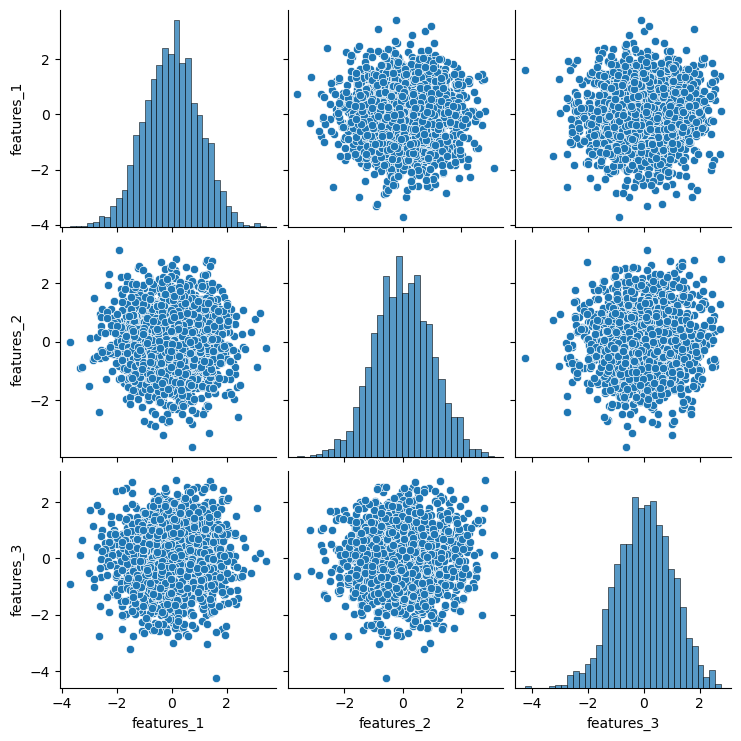

Correlation Matrix:
            features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000


'\nAre these features correlated? YES.\nThe correlation coefficient is close to 0, indicating a very weak or negligible linear relationship between features_1 and features_2\nThe correlation coefficient is positive, indicating a positive linear relationship between features_1 and features_3.\nThe correlation coefficient is positive, indicating a positive linear relationship between features_2 and features_3'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the remote file into a Pandas DataFrame
url = 'https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv?raw=1'
df = pd.read_csv(url)
# Define the features of interest
features = ['features_1', 'features_2', 'features_3']
# Create scatter plots for all possible combinations of features
sns.pairplot(df[features])
plt.show()

# Calculate and display correlation matrix
correlation_matrix = df[features].corr()
print("Correlation Matrix:")
print(correlation_matrix)

"""
Are these features correlated? YES.
The correlation coefficient is close to 0, indicating a very weak or negligible linear relationship between features_1 and features_2
The correlation coefficient is positive, indicating a positive linear relationship between features_1 and features_3.
The correlation coefficient is positive, indicating a positive linear relationship between features_2 and features_3"""

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

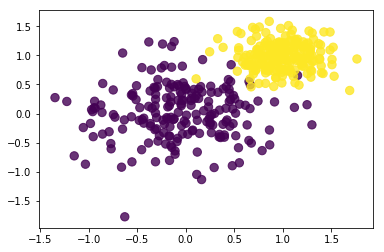

In [9]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

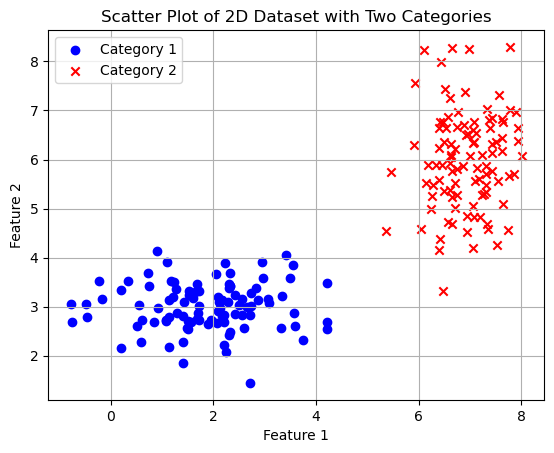

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def generate_2d_gaussian(mean, std_dev, num_samples):
    """
    Generate a 2D Gaussian dataset.

    Parameters:
    - mean: Mean of the Gaussian distribution (2D vector).
    - std_dev: Standard deviation of the Gaussian distribution (2D vector).
    - num_samples: Number of samples to generate.

    Returns:
    - 2D array representing the generated dataset.
    """
    cov_matrix = np.diag(np.square(std_dev))
    samples = np.random.multivariate_normal(mean, cov_matrix, num_samples)
    return samples

def scatter_plot_2d_dataset(dataset_category1, dataset_category2):
    """
    Display a scatter plot of a 2D dataset with two categories.
    """
    plt.scatter(dataset_category1[:, 0], dataset_category1[:, 1], label='Category 1', marker='o', color='blue')
    plt.scatter(dataset_category2[:, 0], dataset_category2[:, 1], label='Category 2', marker='x', color='red')

    plt.title('Scatter Plot of 2D Dataset with Two Categories')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

  

# Generate datasets for two categories
mean_category1 = np.array([2, 3])
std_dev_category1 = np.array([1, 0.5])
dataset_category1 = generate_2d_gaussian(mean_category1, std_dev_category1, num_samples=100)

mean_category2 = np.array([7, 6])
std_dev_category2 = np.array([0.5, 1])
dataset_category2 = generate_2d_gaussian(mean_category2, std_dev_category2, num_samples=100)

# Display scatter plot
scatter_plot_2d_dataset(dataset_category1, dataset_category2)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


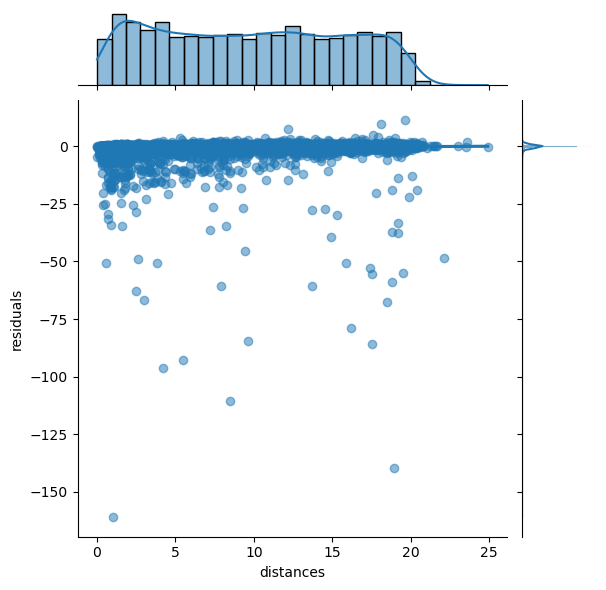

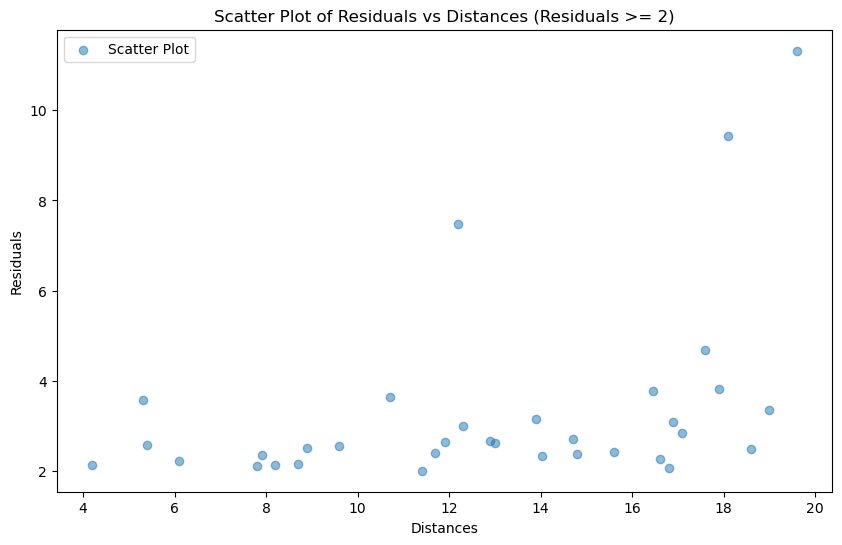

Pearson Correlation Coefficient: 0.05659751187242403
There is a weak or no linear correlation.


In [151]:

import pandas as pd
import pickle
import numpy as np

# Load the pickle file
pickle_file_path = "data/residuals_261 (1).pkl"
with open(pickle_file_path, "rb") as f:
    unpickled_df = pickle.load(f)
print(unpickled_df)

converted_file=data.tolist()
df=pd.DataFrame(converted_file)
df

filtered_df = df[df['residuals'] >= 2]

# Plot the values
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['distances'], filtered_df['residuals'], alpha=0.5, label='Scatter Plot')
plt.title('Scatter Plot of Residuals vs Distances (Residuals >= 2)')
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.legend()
plt.show()

sns.jointplot(x='distances', y='residuals', data=df, kind='reg', scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Residuals vs Distances (Residuals >= 2)')
plt.show()


# Print the correlation coefficient
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

#  the correlation
if correlation_coefficient > 0.8:
    print("There is a strong positive correlation.")
elif correlation_coefficient < -0.8:
    print("There is a strong negative correlation.")
elif 0.5 <= correlation_coefficient <= 0.8:
    print("There is a moderate positive correlation.")
elif -0.8 <= correlation_coefficient <= -0.5:
    print("There is a moderate negative correlation.")
else:
    print("There is a weak or no linear correlation.")



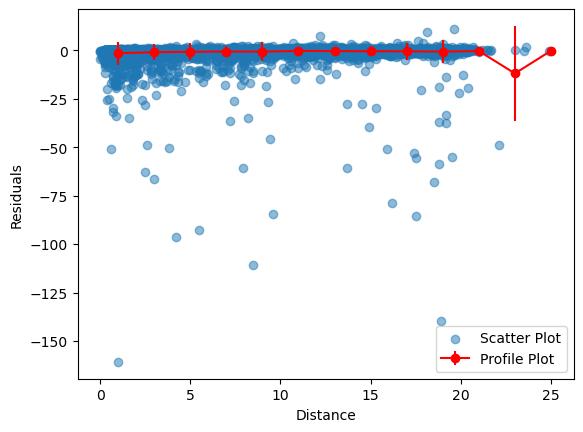

In [143]:
import numpy as np
import matplotlib.pyplot as plt



# Create a profile histogram for the "distance" variable
bin_width = 2.0  # Adjust the bin width as needed
bins = np.arange(0, df['distances'].max() + bin_width, bin_width)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2

# Initialize empty arrays for mean values and standard deviations
y_mean = []
err_y = []

# Calculate mean and standard deviation for each bin
for bin_start, bin_end in zip(bins[:-1], bins[1:]):
    mask = (df['distances'] >= bin_start) & (df['distances'] < bin_end)
    residuals_in_bin = df.loc[mask, 'residuals']
    y_mean.append(residuals_in_bin.mean())
    err_y.append(residuals_in_bin.std())

# Convert lists to numpy arrays
y_mean = np.array(y_mean)
err_y = np.array(err_y)

# Plot the scatter plot
plt.scatter(df['distances'], df['residuals'], alpha=0.5, label='Scatter Plot')

# Plot the profile plot on top of the scatter plot
plt.errorbar(x, y_mean, yerr=err_y, fmt='o-', color='red', label='Profile Plot')

# Add labels and legend
plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.legend()

# Show the plot
plt.show()





# Print the DataFrame
print(df)
4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
